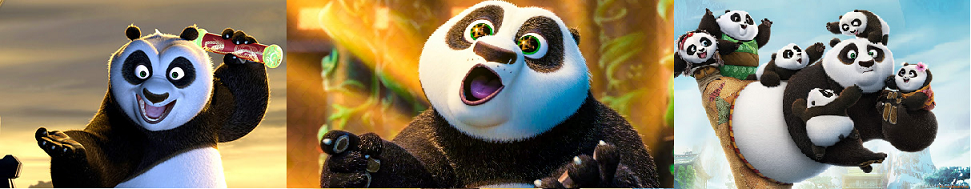

<a id='section_id0'></a>
# BMIS-2542: Data Programming Essentials *with Python* 
##### Katz Graduate School of Business, University of Pittsburgh


## Session 3: Data Wrangling with Pandas -2

<font color="#740202">**Session-3 Topics:**</font>
    
|No.|Topic||No.|Topic||No.|Topic|
|:------|:------||:------|:------||:------|:------|
|1.|[Combining DataFrames](#section_id1)||2.|[Matching Data](#section_id1a)||3.|[Handling Dates](#section_id2)|
|4.|[Missing Values Information](#section_id3)  ||5.|[Categorizing Information](#section_id4)  ||6.|[Rank and Rank Percentile](#section_id5)  |
|7.|[Tabulating and Querying](#section_id6)  ||8.|[Additional Resources](#section_id7)  ||||||

***
<font color="#740202">**List of Session-3 Exercises:**</font>

(1) [Combining data](#section_id-ex1), (2) [Date stuff](#section_id-ex2), (3) [Missing values](#section_id-ex3), (4) [Categorization](#section_id-ex4), (5) [Ranking](#section_id-ex5), and (6) [Pivot/Crosstabs](#section_id-ex6)
***

Quick cheat sheets: 
(1) The [official Pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf), (2) a one-page [comunity-created cheat sheet](https://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3), and (3) a list of [Pandas commands in one page](https://s3.amazonaws.com/dq-blog-files/pandas-cheat-sheet.pdf)
***

In [1]:
# load required modules
import pandas as pd
import numpy as np
import datetime

<a id='section_id1'></a>
### <span style="background-color:#B0E0E6">Combining DataFrames</span>
Data may be spread across a number of files or databases or be arranged in a form that is not easy to analyze. This section focuses on tools to combine and join data.<br>
Data contained in pandas objects can be combined in a number of ways:
 - **pandas.merge**: connects rows in DataFrames based on one or more keys (similar to database joins)
 - **pandas.concat**: concatenates or "stacks" together objects along a specified axis

#### Database-Style DataFrame Joins
Merge or join operations combine datasets by linking rows using one or more keys.

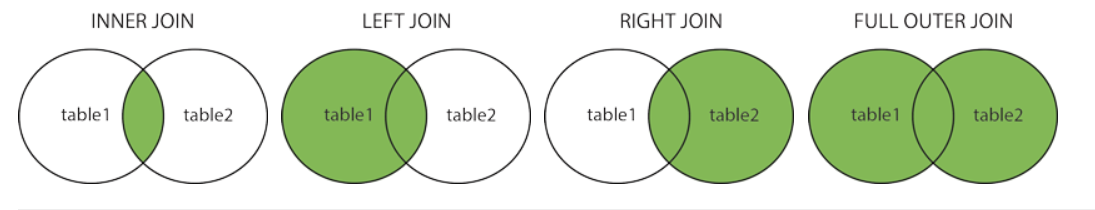
[<center>Source</center>](https://www.w3schools.com/sql/sql_join.asp)

In [2]:
dfCustomers = pd.DataFrame({'customer_id':[1,2,3], 'name':['A', 'B', 'C']})
dfCustomers

,customer_id,name
0,1,A
1,2,B
2,3,C


In [3]:
dfOrders = pd.DataFrame({'order_id':[1,2,3,4], 'customer_id':[2,2,1,5], 'value':[1000,2000,3000,4000]})
dfOrders

,order_id,customer_id,value
0,1,2,1000
1,2,2,2000
2,3,1,3000
3,4,5,4000


By default, `merge` does an inner join. The keys in the result are the intersection or the common set found on both tables. Other possible options are `left`, `right`, and `outer` joins.

In [4]:
dfMerged = pd.merge(dfOrders, dfCustomers, on='customer_id')
dfMerged

,order_id,customer_id,value,name
0,1,2,1000,B
1,2,2,2000,B
2,3,1,3000,A


In [5]:
dfMergedLeft = pd.merge(dfOrders, dfCustomers, on='customer_id', how='left')
dfMergedLeft

,order_id,customer_id,value,name
0,1,2,1000,B
1,2,2,2000,B
2,3,1,3000,A
3,4,5,4000,NaN


In [6]:
dfMergedRight = pd.merge(dfOrders, dfCustomers, on='customer_id', how='right')
dfMergedRight

,order_id,customer_id,value,name
0,1.0,2,1000.0,B
1,2.0,2,2000.0,B
2,3.0,1,3000.0,A
3,NaN,3,NaN,C


In [7]:
dfMergedOuter = pd.merge(dfOrders, dfCustomers, on='customer_id', how='outer')
dfMergedOuter

,order_id,customer_id,value,name
0,1.0,2,1000.0,B
1,2.0,2,2000.0,B
2,3.0,1,3000.0,A
3,4.0,5,4000.0,NaN
4,NaN,3,NaN,C


In [8]:
# Suppose the Customer Name column of the Customers DataFrame is "c_id" instead of "customer_id"
dfCustomers2 = pd.DataFrame({'c_id':[1,2,3], 'name':['A', 'B', 'C']})
dfCustomers2

,c_id,name
0,1,A
1,2,B
2,3,C


In [9]:
# If the merging column names are different, they can be specified separately using "left_on" and "right_on"
dfMergedDiff = pd.merge(dfOrders, dfCustomers2, left_on ='customer_id', right_on = 'c_id')
dfMergedDiff

,order_id,customer_id,value,c_id,name
0,1,2,1000,2,B
1,2,2,2000,2,B
2,3,1,3000,1,A


In [10]:
dfMergedDiffLeft = pd.merge(dfOrders, dfCustomers2, left_on ='customer_id', right_on = 'c_id', how="left")
dfMergedDiffLeft

,order_id,customer_id,value,c_id,name
0,1,2,1000,2.0,B
1,2,2,2000,2.0,B
2,3,1,3000,1.0,A
3,4,5,4000,NaN,NaN


#### Merging with Multiple Keys

In [11]:
leftTable = pd.DataFrame({'key1':['foo', 'foo','bar'], 'key2':['one', 'two', 'one'], 'left_val':[1,2,3]})
rightTable = pd.DataFrame({'key1':['foo', 'foo','bar','bar'], 'key2':['one', 'one', 'one','two'], 'right_val':[4,5,6,7]})

In [12]:
leftTable

,key1,key2,left_val
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [13]:
rightTable

,key1,key2,right_val
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [14]:
pd.merge(leftTable, rightTable, on=['key1', 'key2'])

,key1,key2,left_val,right_val
0,foo,one,1,4
1,foo,one,1,5
2,bar,one,3,6


In [15]:
dfLeft = pd.DataFrame({'key1':['foo', 'foo','bar'], 'key2':['one', 'two', 'one'], 'left_val':[1,2,3]})
dfRight = pd.DataFrame({'key3':['foo', 'foo','bar','bar'], 'key4':['one', 'one', 'one','two'], 'right_val':[4,5,6,7]})

In [16]:
dfLeft

,key1,key2,left_val
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [17]:
dfRight

,key3,key4,right_val
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


Let's merge `dfLeft` and `dfRight` by an inner join on `dfLeft.key1 = dfRight.key3` and `dfLeft.key2 = dfRight.key4` 

In [18]:
pd.merge(dfLeft, dfRight, left_on=['key1', 'key2'], right_on=['key3', 'key4'])

,key1,key2,left_val,key3,key4,right_val
0,foo,one,1,foo,one,4
1,foo,one,1,foo,one,5
2,bar,one,3,bar,one,6


***
<a id='section_id-ex1'></a>
### <span style="background-color:#CCFFCC">Class Exercise-1: Combining DataFrames</span>
* Create a new Jupyter notebook. Name it "Session3_Exercises," and do the usual formatting (name, email information, etc.)
* Insert a new markdown cell in the notebook and type in the header "Exercise-1".
* Use the dataframes in the example below. Combine the dataframes in a way to display the answers to the following questions:
    * How many shares of S1 does Anne hold?
    * How many shares of Yahoo does John hold?
***
<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

In [19]:
dfInvestors = pd.DataFrame({'INo':['I1', 'I2', 'I3'],'IName':['Anne', 'John', 'Elizabeth'],'PhoneNo':['412-456-4567', '585-673-4572', '763-567-8953']})
dfSecurities =  pd.DataFrame({'SNo':['S1', 'S2', 'S3', 'S4', 'S5', 'S6'], 'SName':['Microsoft', 'Kodak', 'IBM','Xerox', 'Amazon', 'Yahoo'], 'Price':[78, 45, 68, 123, 34,78]})
dfHoldings = pd.DataFrame({'INo':['I1','I1','I1','I1','I2','I2','I3','I3','I3'],'SNo':['S1','S2','S3','S4','S2','S6','S1','S3','S4'],'Qty':[500, 2000, 90,200,917,324,1000,346,780]})

In [20]:
dfInvestors

,INo,IName,PhoneNo
0,I1,Anne,412-456-4567
1,I2,John,585-673-4572
2,I3,Elizabeth,763-567-8953


In [21]:
dfSecurities

,SNo,SName,Price
0,S1,Microsoft,78
1,S2,Kodak,45
2,S3,IBM,68
3,S4,Xerox,123
4,S5,Amazon,34
5,S6,Yahoo,78


In [22]:
dfHoldings

,INo,SNo,Qty
0,I1,S1,500
1,I1,S2,2000
2,I1,S3,90
3,I1,S4,200
4,I2,S2,917
5,I2,S6,324
6,I3,S1,1000
7,I3,S3,346
8,I3,S4,780


#### Concatenating Along an Axis

In [23]:
# Combine two DataFrames with identical columns
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])

In [24]:
df1

,letter,number
0,a,1
1,b,2


In [25]:
df2

,letter,number
0,c,3
1,d,4


In [26]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [27]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']], columns=['letter', 'number', 'animal'])
df3

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [28]:
# Combine DataFrame objects with overlapping columns and return everything. 
# Columns outside the intersection will be filled with NaN values.
pd.concat([df1, df3], sort=False, ignore_index=True)

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
2,c,3,cat
3,d,4,dog


In [29]:
# Combine DataFrame objects with overlapping columns and return only those that are shared 
pd.concat([df1, df3], join="inner", ignore_index=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


In [30]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],  columns=['animal', 'name'])
df4

,animal,name
0,bird,polly
1,monkey,george


In [31]:
# Combine DataFrame objects horizontally, by specifying the axis
pd.concat([df1, df4], axis=1)

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id1a'></a>
### <span style="background-color:#B0E0E6">Matching Information</span>

We'll use the "grader.csv" dataset for this example. The file is posted on Pitt Canvas.

In [32]:
df1 = pd.read_csv('grader.csv')

In [33]:
df1.head()

,grader,user,username,assignment,rating,age,timestamp,State
0,1.0,1.0,John,1.0,4.0,35.0,1.570467e+09,AK
1,2.0,NaN,John,NaN,4.0,45.0,1.570467e+09,AK
2,3.0,1.0,John,1.0,7.0,55.0,1.570467e+09,AK
3,1.0,2.0,Johnny,1.0,7.0,35.0,1.570467e+09,AL
4,2.0,2.0,Johnny,1.0,3.0,45.0,1.570467e+09,AL


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

###### Matching need:
Include a new column called “region” that is populated according to the U.S. State
* This is a common issue in data wrangling as showcased by [this Stackoverflow discussion](https://stackoverflow.com/questions/45556197/get-us-census-regions-using-states)
* We'll reuse the mapping others have posted, for example, in this [GitHub file](https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv).

In [34]:
df2=pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

In [35]:
df2.columns

Index(['State', 'State Code', 'Region', 'Division'], dtype='object')

In [36]:
graderdf=pd.merge(df1, df2, left_on = 'State', right_on = 'State Code', how='left')

In [37]:
graderdf.head()

,grader,user,username,assignment,rating,age,timestamp,State_x,State_y,State Code,Region,Division
0,1.0,1.0,John,1.0,4.0,35.0,1.570467e+09,AK,Alaska,AK,West,Pacific
1,2.0,NaN,John,NaN,4.0,45.0,1.570467e+09,AK,Alaska,AK,West,Pacific
2,3.0,1.0,John,1.0,7.0,55.0,1.570467e+09,AK,Alaska,AK,West,Pacific
3,1.0,2.0,Johnny,1.0,7.0,35.0,1.570467e+09,AL,Alabama,AL,South,East South Central
4,2.0,2.0,Johnny,1.0,3.0,45.0,1.570467e+09,AL,Alabama,AL,South,East South Central


In [38]:
graderdf.drop('State_x', axis='columns', inplace=True)

In [39]:
graderdf.rename(columns={'State_y': 'State'}, inplace=True)

In [40]:
graderdf.head()

,grader,user,username,assignment,rating,age,timestamp,State,State Code,Region,Division
0,1.0,1.0,John,1.0,4.0,35.0,1.570467e+09,Alaska,AK,West,Pacific
1,2.0,NaN,John,NaN,4.0,45.0,1.570467e+09,Alaska,AK,West,Pacific
2,3.0,1.0,John,1.0,7.0,55.0,1.570467e+09,Alaska,AK,West,Pacific
3,1.0,2.0,Johnny,1.0,7.0,35.0,1.570467e+09,Alabama,AL,South,East South Central
4,2.0,2.0,Johnny,1.0,3.0,45.0,1.570467e+09,Alabama,AL,South,East South Central


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id2'></a>
### <span style="background-color:#B0E0E6">Handling Dates</span>
To find out how many assignments were graded in September:
* We need to convert the timestamp to a date value
* The timestamp is in the Unix epoch time (or POSIX time),  an indicator of the number of seconds elapsed since 0 hours UTC on 01 January 1970. [See for more details](https://en.wikipedia.org/wiki/Unix_time)

 #### Date Conversions

In [41]:
graderdf['date']=pd.to_datetime(graderdf['timestamp'], unit='s', errors='coerce')

In [42]:
graderdf.tail()

,grader,user,username,assignment,rating,age,timestamp,State,State Code,Region,Division,date
13,2.0,2.0,Johnny,2.0,6.0,45.0,1.567906e+09,New York,NY,Northeast,Middle Atlantic,2019-09-08 01:28:18
14,3.0,2.0,Johnny,2.0,4.0,55.0,1.567906e+09,New York,NY,Northeast,Middle Atlantic,2019-09-08 01:29:58
15,1.0,3.0,Johnson,2.0,10.0,35.0,1.567906e+09,West Virginia,WV,South,South Atlantic,2019-09-08 01:31:38
16,2.0,3.0,Johnson,2.0,3.0,45.0,1.567906e+09,West Virginia,WV,South,South Atlantic,2019-09-08 01:33:18
17,3.0,3.0,Johnson,2.0,NaN,NaN,NaN,West Virginia,WV,South,South Atlantic,NaT


In [43]:
graderdf['year']=pd.to_datetime(graderdf['date']).dt.to_period('Y')

In [44]:
graderdf.head()

,grader,user,username,assignment,rating,age,timestamp,State,State Code,Region,Division,date,year
0,1.0,1.0,John,1.0,4.0,35.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:44:54,2019
1,2.0,NaN,John,NaN,4.0,45.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:45:20,2019
2,3.0,1.0,John,1.0,7.0,55.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:45:46,2019
3,1.0,2.0,Johnny,1.0,7.0,35.0,1.570467e+09,Alabama,AL,South,East South Central,2019-10-07 16:46:12,2019
4,2.0,2.0,Johnny,1.0,3.0,45.0,1.570467e+09,Alabama,AL,South,East South Central,2019-10-07 16:46:38,2019


In [45]:
graderdf['month'] = pd.DatetimeIndex(graderdf['date']).month
graderdf.head()

,grader,user,username,assignment,rating,age,timestamp,State,State Code,Region,Division,date,year,month
0,1.0,1.0,John,1.0,4.0,35.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:44:54,2019,10.0
1,2.0,NaN,John,NaN,4.0,45.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:45:20,2019,10.0
2,3.0,1.0,John,1.0,7.0,55.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:45:46,2019,10.0
3,1.0,2.0,Johnny,1.0,7.0,35.0,1.570467e+09,Alabama,AL,South,East South Central,2019-10-07 16:46:12,2019,10.0
4,2.0,2.0,Johnny,1.0,3.0,45.0,1.570467e+09,Alabama,AL,South,East South Central,2019-10-07 16:46:38,2019,10.0


Check out the documentation for [DatetimeIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html)

#### Counting data
How many assingments were graded in September?

In [46]:
graderdf[graderdf['month']==9].shape[0]

5

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

***
<a id='section_id-ex2'></a>
### <span style="background-color:#CCFFCC">Class Exercise-2: Date stuff</span>
* Insert a new markdown cell in the notebook and type in the header "Exercise-3".
* Use the Movie Lens dataset posted on Canvas for answering this question: How many movies were rated in the fourth quarter of 2000?
***
<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id3'></a>
### <span style="background-color:#B0E0E6">Compiling Information on Missing Values</span>

To get an idea of missing values, let us create a dataframe with the following information:

| grader| counts |missing count | missing proportion|
|-------|--------|--------------|-------------------|
|--xx---|--xx----|---xx---------|--xx---------------|


#### Missing Data

In [47]:
graderdf.isna().sum() #missing values in each column

grader        1
user          1
username      0
assignment    2
rating        2
age           1
timestamp     1
State         0
State Code    0
Region        0
Division      0
date          1
year          1
month         1
dtype: int64

In [48]:
graderdf.isna().sum().sum() #chain functioning -- total missing values in the dataframe

11

In [49]:
graderdf[graderdf.isna().any(axis=1)].shape[0] #number of rows with atleast one missing values in a record (row)

5

In [50]:
graderdf[graderdf.isna().any(axis=1)].index

Int64Index([1, 6, 10, 11, 17], dtype='int64')

In [51]:
graderdf.head()

,grader,user,username,assignment,rating,age,timestamp,State,State Code,Region,Division,date,year,month
0,1.0,1.0,John,1.0,4.0,35.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:44:54,2019,10.0
1,2.0,NaN,John,NaN,4.0,45.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:45:20,2019,10.0
2,3.0,1.0,John,1.0,7.0,55.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:45:46,2019,10.0
3,1.0,2.0,Johnny,1.0,7.0,35.0,1.570467e+09,Alabama,AL,South,East South Central,2019-10-07 16:46:12,2019,10.0
4,2.0,2.0,Johnny,1.0,3.0,45.0,1.570467e+09,Alabama,AL,South,East South Central,2019-10-07 16:46:38,2019,10.0


In [52]:
graderdf['missing']=0 #create a dummy variable

In [53]:
graderdf.loc[graderdf.isna().any(axis=1), 'missing']=1 #mark a row if it is missing at least one missing value

In [54]:
graderdf[graderdf.isna().any(axis=1)]

,grader,user,username,assignment,rating,age,timestamp,State,State Code,Region,Division,date,year,month,missing
1,2.0,NaN,John,NaN,4.0,45.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:45:20,2019,10.0,1
6,1.0,3.0,Johnson,NaN,1.0,35.0,1.570467e+09,California,CA,West,Pacific,2019-10-07 16:47:30,2019,10.0,1
10,2.0,1.0,John,2.0,NaN,45.0,1.570467e+09,Pennsylvania,PA,Northeast,Middle Atlantic,2019-10-07 16:49:14,2019,10.0,1
11,NaN,1.0,John,2.0,8.0,55.0,1.570467e+09,Pennsylvania,PA,Northeast,Middle Atlantic,2019-10-07 16:49:40,2019,10.0,1
17,3.0,3.0,Johnson,2.0,NaN,NaN,NaN,West Virginia,WV,South,South Atlantic,NaT,NaT,NaN,1


In [55]:
graderdf[graderdf['missing']==1].shape[0]

5

In [56]:
gradergroup1=graderdf.groupby(['grader'])['grader'].agg('count').reset_index(name='counts')

In [57]:
gradergroup1

,grader,counts
0,1.0,6
1,2.0,6
2,3.0,5


In [58]:
gradergroup2=graderdf.groupby(['grader'])['missing'].agg('sum').reset_index(name='missingcount')

In [59]:
gradergroup2

,grader,missingcount
0,1.0,1
1,2.0,2
2,3.0,1


In [60]:
gradergroup=pd.merge(gradergroup1, gradergroup2, how='outer')

In [61]:
gradergroup

,grader,counts,missingcount
0,1.0,6,1
1,2.0,6,2
2,3.0,5,1


In [62]:
gradergroup['missingprop']=gradergroup.missingcount/gradergroup.counts*100

In [63]:
gradergroup

,grader,counts,missingcount,missingprop
0,1.0,6,1,16.666667
1,2.0,6,2,33.333333
2,3.0,5,1,20.000000


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

***
<a id='section_id-ex3'></a>
### <span style="background-color:#CCFFCC">Class Exercise-3: Compiling missing values</span>
* Insert a new markdown cell in the notebook and type in the header "Exercise-2".
* Use the Movie Lens dataset posted on Canvas for this exercise.
* Create a dataframe that compiles the count of missing values in the Movie Lens dataset.

| Movie ID| Total record count |Count of records with missing values| missing proportion|
|-------|--------|--------------|-------------------|
|||||

***
<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id4'></a>
### <span style="background-color:#B0E0E6">Categorizing Information</span>

* Insert a score_category depending on the movie rating:
    * <4 --> ok
    * 4-7 --> good
    * greater than 8 --> excellent

In [64]:
graderdf['score_category']=pd.cut(graderdf['rating'], bins=[1,3,7,10], labels=['ok', 'good', 'excellent'])
graderdf.head()

,grader,user,username,assignment,rating,age,timestamp,State,State Code,Region,Division,date,year,month,missing,score_category
0,1.0,1.0,John,1.0,4.0,35.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:44:54,2019,10.0,0,good
1,2.0,NaN,John,NaN,4.0,45.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:45:20,2019,10.0,1,good
2,3.0,1.0,John,1.0,7.0,55.0,1.570467e+09,Alaska,AK,West,Pacific,2019-10-07 16:45:46,2019,10.0,0,good
3,1.0,2.0,Johnny,1.0,7.0,35.0,1.570467e+09,Alabama,AL,South,East South Central,2019-10-07 16:46:12,2019,10.0,0,good
4,2.0,2.0,Johnny,1.0,3.0,45.0,1.570467e+09,Alabama,AL,South,East South Central,2019-10-07 16:46:38,2019,10.0,0,ok


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

***
<a id='section_id-ex4'></a>
### <span style="background-color:#CCFFCC">Class Exercise-4: Categorization</span>
* Insert a new markdown cell in the notebook and type in the header "Exercise-4".
* Use the Movie Lens dataset posted on Canvas for this exercise
* Insert a new column called "rating_category" into the dataframe. It is coded as following depending on the value of "movie rating": 1 & 2: Okay; 3 & 4: Good; 5: Excellent
***
<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id5'></a>
### <span style="background-color:#B0E0E6">Deriving Rank and Percentile Rank</span>
Display the rank and percentile score of each user

In [65]:
user_avg=graderdf[['user', 'rating']].groupby('user').mean().reset_index()
user_avg

,user,rating
0,1.0,5.75
1,2.0,4.50
2,3.0,4.60


In [66]:
user_avg.sort_values(by=['rating'])

,user,rating
1,2.0,4.50
2,3.0,4.60
0,1.0,5.75


In [67]:
user_avg['rank']=user_avg['rating'].rank(ascending=False)
user_avg

,user,rating,rank
0,1.0,5.75,1.0
1,2.0,4.50,3.0
2,3.0,4.60,2.0


In [68]:
user_avg['pctrank']=user_avg['rating'].rank(pct=True)
user_avg

,user,rating,rank,pctrank
0,1.0,5.75,1.0,1.000000
1,2.0,4.50,3.0,0.333333
2,3.0,4.60,2.0,0.666667


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

***
<a id='section_id-ex5'></a>
### <span style="background-color:#CCFFCC">Class Exercise-5: Grouping and ranking</span>
* Insert a new markdown cell in the notebook and type in the header "Exercise-5".
* Create a dataframe with this information based on the Movie Lens dataset

| Movie ID| Average rating |Absolute rank| Percentile rank|
|-------|--------|--------------|-------------------|
|||||

***
<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id6'></a>
### <span style="background-color:#B0E0E6">Tabulating Information & Querying</span>
Aggregate and display the scores for each user per grader in a table. Then, query the above table for a user with name containing “son”!

In [69]:
pd.crosstab(graderdf.username, graderdf.grader, values=graderdf.rating, aggfunc=np.mean)

grader,1.0,2.0,3.0
username,,,
John,4.0,4.0,7.0
Johnny,4.5,4.5,4.5
Johnson,5.5,2.0,8.0


In [70]:
pd.crosstab(graderdf.username, graderdf.grader, values=graderdf.rating, aggfunc=np.mean).reset_index()

grader,username,1.0,2.0,3.0
0,John,4.0,4.0,7.0
1,Johnny,4.5,4.5,4.5
2,Johnson,5.5,2.0,8.0


In [71]:
table=pd.pivot_table(graderdf, values='rating', index=['username', 'grader'], aggfunc=np.mean)

##### Querying the table

In [72]:
table.query('username==["Johnson"]')

rating
username grader        
Johnson  1.0        5.5
         2.0        2.0
         3.0        8.0

In [73]:
graderdf[graderdf.username.str.contains('son')]

,grader,user,username,assignment,rating,age,timestamp,State,State Code,Region,Division,date,year,month,missing,score_category
6,1.0,3.0,Johnson,NaN,1.0,35.0,1.570467e+09,California,CA,West,Pacific,2019-10-07 16:47:30,2019,10.0,1,NaN
7,2.0,3.0,Johnson,1.0,1.0,45.0,1.570467e+09,California,CA,West,Pacific,2019-10-07 16:47:56,2019,10.0,0,NaN
8,3.0,3.0,Johnson,1.0,8.0,55.0,1.570467e+09,California,CA,West,Pacific,2019-10-07 16:48:22,2019,10.0,0,excellent
15,1.0,3.0,Johnson,2.0,10.0,35.0,1.567906e+09,West Virginia,WV,South,South Atlantic,2019-09-08 01:31:38,2019,9.0,0,excellent
16,2.0,3.0,Johnson,2.0,3.0,45.0,1.567906e+09,West Virginia,WV,South,South Atlantic,2019-09-08 01:33:18,2019,9.0,0,ok
17,3.0,3.0,Johnson,2.0,NaN,NaN,NaN,West Virginia,WV,South,South Atlantic,NaT,NaT,NaN,1,NaN


In [74]:
table.reset_index()[table.reset_index().username.str.contains('son')]

,username,grader,rating
6,Johnson,1.0,5.5
7,Johnson,2.0,2.0
8,Johnson,3.0,8.0


***
<a id='section_id-ex6'></a>
### <span style="background-color:#CCFFCC">Class Exercise-6: Pivot/crosstabs</span>
* Insert a new markdown cell in the notebook and type in the header "Exercise-6".
* Use the Movie Lens dataset, and show a table with the average ratings of movies in Zip codes that contain the term "007".
***
<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<Mark>**Next Steps:**</Mark>

* Complete all the exercises listed in this notebook.
* Complete Assignment-1 and earn a Kaggle certificate on data wrangling with Pandas.
* Use the resources listed in the references for additional practice.

***
<font color="#740202">**List of Session-3 Exercises:**

(1) [Combining data](#section_id-ex1), (2) [Date stuff](#section_id-ex2), (3) [Missing values](#section_id-ex3), (4) [Categorization](#section_id-ex4), (5) [Ranking](#section_id-ex5), and (6) [Pivot/Crosstabs](#section_id-ex6)

***
<a id='section_id7'></a>
### <span style="background-color:#B0E0E6">Additional References</span>

 - The [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) is a good resource that provides a
 long list of [Pandas Tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
 - Chapter 5 of [Python for Data Analysis 2<sup>nd</sup> edition](https://pitt.primo.exlibrisgroup.com/permalink/01PITT_INST/i25aoe/cdi_safari_books_9781491957653) by Wes McKinney
 - Try this [collection of Pandas exercises](https://github.com/guipsamora/pandas_exercises) recommended for new Pandas users.
 - Go through these examples on [data munging](http://wavedatalab.github.io/datawithpython/munge.html) and [data aggregation](http://wavedatalab.github.io/datawithpython/aggregate.html) 
 - A very useful series of [lessons on effective Pandas](https://github.com/TomAugspurger/effective-pandas)
 - This set of [100 Pandas puzzles](https://github.com/ajcr/100-pandas-puzzles) also looks interesting; try them out.
 ***

<font color="#610B21"><center>\~\~ End of Session-3. We'll learn about exploratory analysis and data visualization in Session-5\~\~ </center>
<font color="#0B610B"><center>\*\* **Good luck with Assignment-1!**\*\* </center>
***

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>